In [64]:
# Install Libraries
#!pip install textblob
#!pip install tweepy
#!pip install pycountry
#!pip install wordcloud
#!pip install langdetect
#!pip install spacy
#!python -m spacy download en
import nltk
nltk.download('vader_lexicon')
import nltk
nltk.download('stopwords')


     --------------------------------------- 12.8/12.8 MB 12.1 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the full
pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


2022-09-14 08:20:52.158465: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2022-09-14 08:20:52.158501: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-14 08:20:54.156579: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library nvcuda.dll
2022-09-14 08:20:54.156699: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:0b:00.0 name: NVIDIA GeForce RTX 2060 SUPER computeCapability: 7.5
coreClock: 1.65GHz coreCount: 34 deviceMemorySize: 8.00GiB deviceMemoryBandwidth: 417.29GiB/s
2022-09-14 08:20:54.157575: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2022-09-14 08:20:54.157596: I tensorflow/stream_exe

True

In [6]:
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import datetime
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [7]:
consumerKey = 'uNaiYSCk3lKixcs08LoJJO6Fq'
consumerSecret = 'pDRfRMtRBF2NRGkE1EuhFUmeI0sUKoYY8zXF2gZbtFu7WbSM1L'
accessToken = '2851484161-Xrrx6BN3GOq5g4GxnVTBMzrUcE5CgDCchjkkHn4'
accessTokenSecret = '2WSfokQ945vXeSf2onWOqzSxd9RnnoDzs42EC6SIgiuId'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth, wait_on_rate_limit = True)


In [8]:
api

## Sentiment Analysis 

In [9]:
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#looking for the current sentiment of people regarding Queen Elizabeth's recent death that are orginal posts 
#in English
keyword = "queen elizabeth death lang:en -is:retweet"
noOfTweet = 2000


tweets = tweepy.Cursor(api.search_tweets, q=keyword, tweet_mode="extended").items(noOfTweet)

In [16]:
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []


for tweet in tweets:
    try:
        temp = tweet.retweeted_status.full_text
    except AttributeError:  # Not a Retweet
        temp = tweet.full_text
    #print(tweet.text)
    tweet_list.append(temp)
    analysis = TextBlob(temp)
    score = SentimentIntensityAnalyzer().polarity_scores(temp)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity

    if neg > pos:
        negative_list.append(temp)
        negative += 1
    elif pos > neg:
        positive_list.append(temp)
        positive += 1

    elif pos == neg:
        neutral_list.append(temp)
        neutral += 1
        
        
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

In [17]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  1996
positive number:  304
negative number:  1607
neutral number:  85


In [41]:
import csv 

with open('tweets.csv', 'w', encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(tweet_list[0].values)

In [56]:
temp = pd.read_csv('tweets.csv', header = None)
tweet_list

,0,text
0,I have blogged my monologue about the death of...,blogged monologue death queen elizabeth iiwrit...
1,"With the death of Queen Elizabeth II, as far a...",death queen elizabeth ii far tell bernhard goe...
2,Read along for a brief overview of Queen Eliza...,read along brief overview queen elizabeths rei...
3,"New work for the @nytopinion, continuing the c...",new work nytopinion continuing coverage death ...
4,"For those wondering why ""Metroid Prime Remaste...",wondering metroid prime remastered wasnt annou...
...,...,...
1988,❗️❗️ RESCHEDULED - Collingwood Royal Marines B...,rescheduled collingwood royal marines band sho...
1989,"The level of respect, appreciation and love fo...",level respect appreciation love maj incredible...
1991,Bank Holiday for the State Funeral of HM Queen...,bank holiday state funeral hm queen elizabeth ...
1994,The Sabina Project - 'Sabina Nessa Memorial Ga...,sabina project sabina nessa memorial garden un...


In [13]:
#Example: Dont Run
for tweet in tweets:
    print(tweet)
    break

Status(_api=<tweepy.api.API object at 0x000002678A83DEE0>, _json={'created_at': 'Wed Sep 14 14:36:06 +0000 2022', 'id': 1570058813268443137, 'id_str': '1570058813268443137', 'full_text': 'RT @WajahatAli: "Run the Jewels." My piece on Queen Elizabeth\'s death and the monarchy. \n\nHow King Charles Can Deal With Britain’s Racist,…', 'truncated': False, 'display_text_range': [0, 139], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'WajahatAli', 'name': 'Wajahat Ali', 'id': 21733692, 'id_str': '21733692', 'indices': [3, 14]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 425133057, 'id_str': '425133057', 'name': 'Dez2u 🇺🇸 🇩🇪💜', 'screen_name': 'dezhentz', 'loca

## Cleaning for Sentiment Analysis

In [45]:
tweet_list.drop_duplicates(inplace = True)
tweet_list

,0
0,I have blogged my monologue about the death of...
1,"With the death of Queen Elizabeth II, as far a..."
2,Read along for a brief overview of Queen Eliza...
3,"New work for the @nytopinion, continuing the c..."
4,"For those wondering why ""Metroid Prime Remaste..."
...,...
1988,❗️❗️ RESCHEDULED - Collingwood Royal Marines B...
1989,"The level of respect, appreciation and love fo..."
1991,Bank Holiday for the State Funeral of HM Queen...
1994,The Sabina Project - 'Sabina Nessa Memorial Ga...


In [70]:
import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy

def lemmatize_words(comment):
    document = nlp(comment)
    return " ".join([token.lemma_ for token in document])

#load spacy model
nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner'])
temp = pd.read_csv('tweets.csv', header = None)
    
#maybe use temp next time
df = pd.DataFrame(tweet_list)
df['text'] = tweet_list[0]

# pattern = "RT @.*?\: "
# df['text'] = df['text'].str.replace(pattern, "")
# temp
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

df['text'] = df['text'].str.replace('[^\w\s]','')

stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


df['lemma_text'] = df['text'].apply(lemmatize_words)

df


,0,text,Positive,Negative,Neutral,lemma_text
0,I have blogged my monologue about the death of...,blogged monologue death queen elizabeth iiwrit...,0.000,0.315,0.685,blogge monologue death queen elizabeth iiwritt...
1,"With the death of Queen Elizabeth II, as far a...",death queen elizabeth ii far tell bernhard goe...,0.085,0.163,0.752,death queen elizabeth ii far tell bernhard goe...
2,Read along for a brief overview of Queen Eliza...,read along brief overview queen elizabeths rei...,0.135,0.188,0.676,read along brief overview queen elizabeth reig...
3,"New work for the @nytopinion, continuing the c...",new work nytopinion continuing coverage death ...,0.239,0.176,0.586,new work nytopinion continue coverage death qu...
4,"For those wondering why ""Metroid Prime Remaste...",wondering metroid prime remastered wasnt annou...,0.157,0.122,0.721,wonder metroid prime remastered be not announc...
...,...,...,...,...,...,...
1988,❗️❗️ RESCHEDULED - Collingwood Royal Marines B...,rescheduled collingwood royal marines band sho...,0.000,0.145,0.855,reschedule collingwood royal marines band show...
1989,"The level of respect, appreciation and love fo...",level respect appreciation love maj incredible...,0.384,0.000,0.616,level respect appreciation love maj incredible...
1991,Bank Holiday for the State Funeral of HM Queen...,bank holiday state funeral hm queen elizabeth ...,0.213,0.106,0.681,bank holiday state funeral hm queen elizabeth ...
1994,The Sabina Project - 'Sabina Nessa Memorial Ga...,sabina project sabina nessa memorial garden un...,0.000,0.278,0.722,sabina project sabina nessa memorial garden un...


## Sentiment Analysis

In [71]:
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["text"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["text"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["text"]]

In [72]:
df

,0,text,Positive,Negative,Neutral,lemma_text
0,I have blogged my monologue about the death of...,blogged monologue death queen elizabeth iiwrit...,0.000,0.306,0.694,blogge monologue death queen elizabeth iiwritt...
1,"With the death of Queen Elizabeth II, as far a...",death queen elizabeth ii far tell bernhard goe...,0.089,0.170,0.741,death queen elizabeth ii far tell bernhard goe...
2,Read along for a brief overview of Queen Eliza...,read along brief overview queen elizabeths rei...,0.135,0.188,0.676,read along brief overview queen elizabeth reig...
3,"New work for the @nytopinion, continuing the c...",new work nytopinion continuing coverage death ...,0.252,0.173,0.575,new work nytopinion continue coverage death qu...
4,"For those wondering why ""Metroid Prime Remaste...",wondering metroid prime remastered wasnt annou...,0.106,0.130,0.764,wonder metroid prime remastered be not announc...
...,...,...,...,...,...,...
1988,❗️❗️ RESCHEDULED - Collingwood Royal Marines B...,rescheduled collingwood royal marines band sho...,0.000,0.145,0.855,reschedule collingwood royal marines band show...
1989,"The level of respect, appreciation and love fo...",level respect appreciation love maj incredible...,0.384,0.000,0.616,level respect appreciation love maj incredible...
1991,Bank Holiday for the State Funeral of HM Queen...,bank holiday state funeral hm queen elizabeth ...,0.213,0.106,0.681,bank holiday state funeral hm queen elizabeth ...
1994,The Sabina Project - 'Sabina Nessa Memorial Ga...,sabina project sabina nessa memorial garden un...,0.000,0.273,0.727,sabina project sabina nessa memorial garden un...


In [83]:
vectorizer = CountVectorizer()
vectorizer.fit(df['text'])
vector = vectorizer.transform(df['text'])
print("Encoded Document is:")
print(vector.toarray())

Encoded Document is:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [104]:

sum_words = vector.sum(axis = 0)
sum_words

matrix([[1, 1, 1, ..., 2, 1, 1]], dtype=int64)

In [114]:
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

#due to us searching for queen, elizabeth, and death, that will be the words that show up the most
words_freq = words_freq[4:]
words_freq

data = pd.DataFrame(words_freq, columns = ['Word', 'Count'])

data

,Word,Count
0,majesty,137
1,following,130
2,queens,100
3,elizabeths,90
4,uk,79
...,...,...
5119,parks,1
5120,trust,1
5121,therosemk,1
5122,refer,1


<Figure size 1152x432 with 0 Axes>

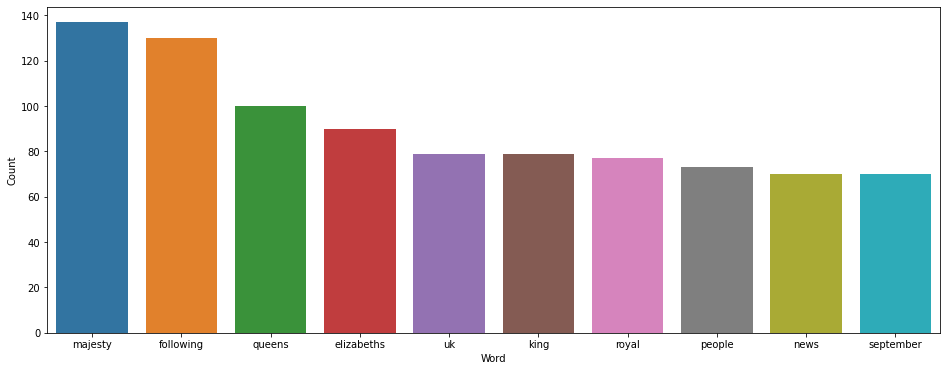

<Figure size 1152x432 with 0 Axes>

In [121]:
import seaborn as sns

#Top 10 words counts in tweets 
temp = data[:10]
plt.figure(figsize=(16, 6))
sns.barplot(data = temp, x = "Word", y = 'Count')

In [126]:
#function for other sentiments
    
def graph_sentiment_analysis(sentiment_list):
    #maybe use temp next time
    df = pd.DataFrame(sentiment_list)
    df['text'] = sentiment_list[0]

    # pattern = "RT @.*?\: "
    # df['text'] = df['text'].str.replace(pattern, "")
    # temp
    df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))

    df['text'] = df['text'].str.replace('[^\w\s]','')

    stop = stopwords.words('english')
    df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))


    df['lemma_text'] = df['text'].apply(lemmatize_words)

    sentiments = SentimentIntensityAnalyzer()
    df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["text"]]
    df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["text"]]
    df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["text"]]
    vectorizer = CountVectorizer()
    vectorizer.fit(df['text'])
    vector = vectorizer.transform(df['text'])
    sum_words = vector.sum(axis = 0)
    sum_words
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

    #due to us searching for queen, elizabeth, and death, that will be the words that show up the most
    words_freq = words_freq[4:]
    words_freq

    data = pd.DataFrame(words_freq, columns = ['Word', 'Count'])

    temp = data[:10]
    plt.figure(figsize=(16, 6))
    sns.barplot(data = temp, x = "Word", y = 'Count')

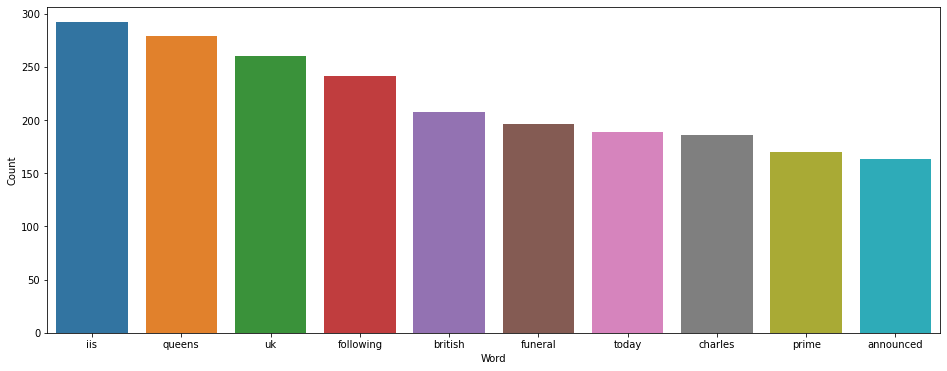

In [135]:
#Top 10 words in negative sentiment tweets
graph_sentiment_analysis(negative_list)

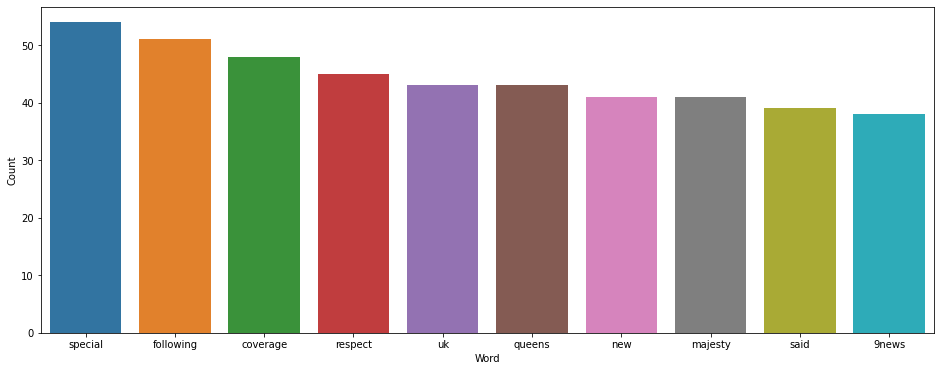

In [128]:
#Top 10 words in positive sentiment tweets
graph_sentiment_analysis(positive_list)

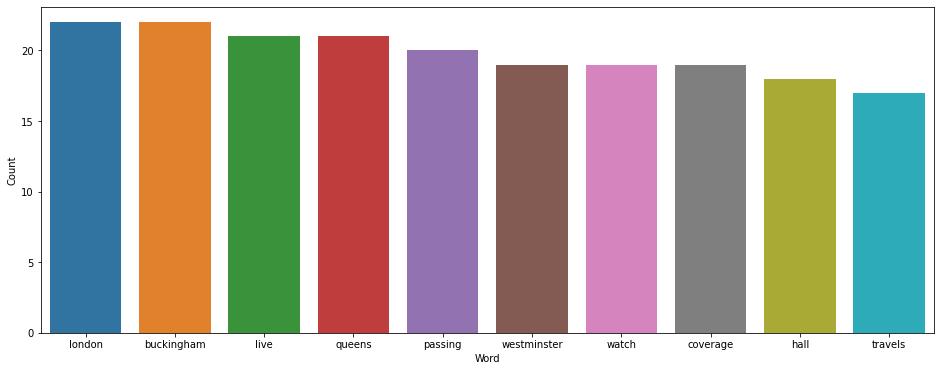

In [129]:
#Top 10 words in neutral sentiment tweets
graph_sentiment_analysis(neutral_list)

## WordCloud

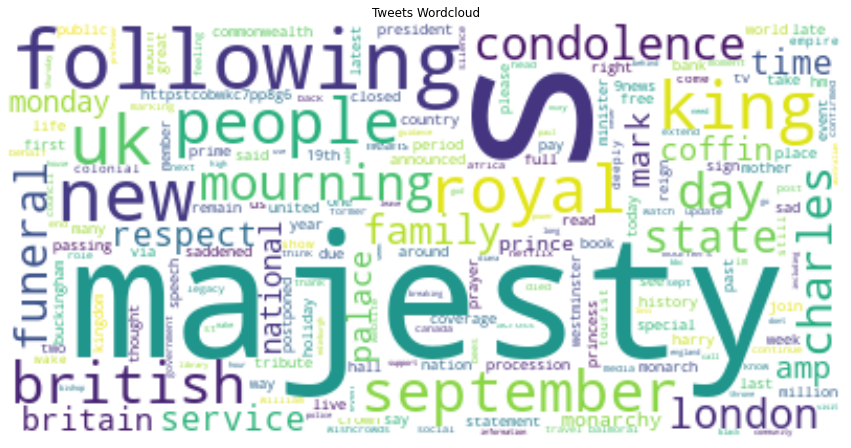

In [168]:
text = " ".join(word for word in tweet_list['text'])
#i removed ii since its a part of Queen Elizabeth ii's name
text = re.sub('elizabeth|death|queen|ii', '', text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Tweets Wordcloud')
plt.show()

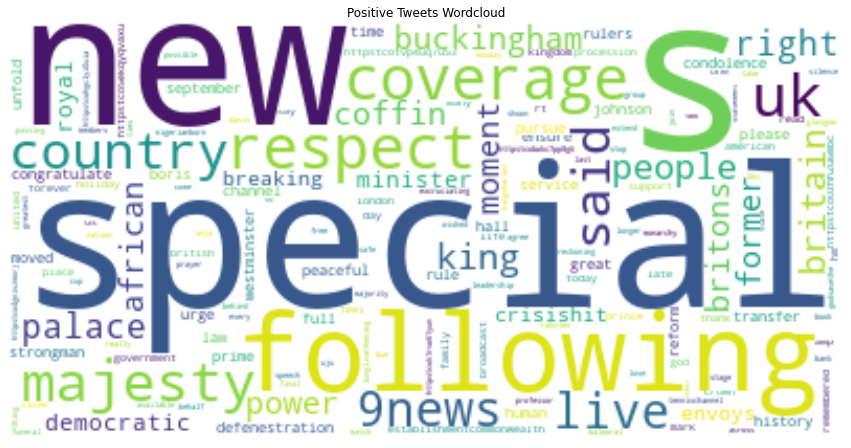

In [167]:
text = " ".join(word for word in positive_list['text'])
#i removed ii since its a part of Queen Elizabeth ii's name
text = re.sub('elizabeth|death|queen|ii', '', text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Positive Tweets Wordcloud')
plt.show()

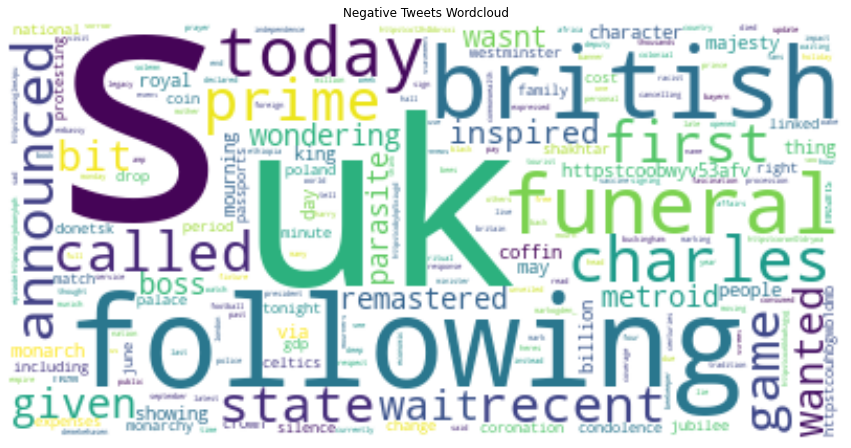

In [162]:
text = " ".join(word for word in negative_list['text'])
#i removed ii since its a part of Queen Elizabeth ii's name
text = re.sub('elizabeth|death|queen|ii', '', text)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
 
# visualize the image
fig=plt.figure(figsize=(15, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title('Negative Tweets Wordcloud')
plt.show()

#Note: Even the negative sentiments include funeral which could still not be tarnishing Queen Elizabeth ii's name